# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: First I will check if there is enough availability of bikes with respect to the users using it.
            I will check if the company is giving offers or not, If I can afford it or not.
            As a user I would ask if I can use the bike more than the time given.
            Are there any extra charges except the bike ride. Is there any insurance cover.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [33]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
import time                          # a nicer way than the base print function.

def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
            
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip

print(example_trips)


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

In [34]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    # YOUR CODE HERE
    
    
    if(city=='Chicago' or city=='NYC'):
        seconds = float(datum['tripduration'])
    else:
        seconds = float(datum['Duration (ms)'])/1000
        
    duration = seconds/60    
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}
for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [35]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # YOUR CODE HERE
    str_date = ""
    if(city=='NYC'):
        str_date =datum['starttime']         
        dt = datetime.strptime(str_date,"%m/%d/%Y %H:%M:%S")
        day_of_week = dt.strftime('%A')
        
    elif(city=='Washington'):
        str_date =datum['Start date']
        dt = datetime.strptime(str_date,"%m/%d/%Y %H:%M")
        day_of_week = dt.strftime('%A')
        
    elif(city=='Chicago'):
        str_date =datum['starttime'] 
        dt = datetime.strptime(str_date,"%m/%d/%Y %H:%M")
        day_of_week = dt.strftime('%A')
        
    
    return (dt.month, dt.hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [36]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    user_type = ""
    if(city=='Chicago' or city=='NYC'):
        user_type = datum['usertype']
    else:
        if(datum['Member Type']=='Registered'):
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [50]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point[out_colnames[0]] = round(duration_in_mins(row, city),1)
            
            month,hour,day_of_week = time_of_trip(row, city)
            
            new_point[out_colnames[1]] = month
            new_point[out_colnames[2]] = hour
            new_point[out_colnames[3]] = day_of_week
            
            new_point[out_colnames[4]] = type_of_user(row, city)

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            

In [51]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.1'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.4'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '14.0'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**:   New York City has the highest number of trips which are 276,798. <br>
              New York City has the highest proportion of trips taken by subscribers which is 89%. <br>
              Chicago has the highest proportion of trips taken by customers which is 24%.

In [39]:
# Helper Methods for this section
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # return tallies as a list
        return(n_subscribers, n_customers)


In [40]:
# Dictionary of city names and filenames with paths
cities = {
    'NYC': './data/NYC-2016-Summary.csv',
    'Chicago': './data/Chicago-2016-Summary.csv',
    'Washington': './data/Washington-2016-Summary.csv'
}

# Convert Ratio to %
def percentage_of(users,total=""):
    '''
    returns percentage of subscribers or customer wrt input.
    '''
    if total == "":      
        return int( round(users*100 ) )
    else:                      
        return int( round( users/total*100 ) )


In [41]:
# Trips Count
trip_count = {}
for city in cities.keys():
    trip_count[city] = {}
    subscriber_trips, customer_trips = number_of_trips( cities[city] )
    trip_count[city]['sub_trips'] = subscriber_trips
    trip_count[city]['cust_trips'] = customer_trips
    

In [42]:
#printing results
for city in cities.keys():
    total_trips = trip_count[city]['sub_trips'] + trip_count[city]['cust_trips']
    print( "Total Trips of {} - {}".format(city,total_trips) )

print("\n")
for city in cities.keys():
    total_trips = trip_count[city]['sub_trips'] + trip_count[city]['cust_trips']
    subscriber_percent = percentage_of( trip_count[city]['sub_trips'], total_trips )
    print( "Subscriber % of {} - {}".format(city,subscriber_percent))

print("\n")
for city in cities.keys():
    total_trips = trip_count[city]['sub_trips'] + trip_count[city]['cust_trips']
    customer_percent = percentage_of( trip_count[city]['cust_trips'], total_trips )
    print( "Customer % of {} - {}".format(city,customer_percent))

Total Trips of NYC - 276798
Total Trips of Chicago - 72131
Total Trips of Washington - 66326


Subscriber % of NYC - 89
Subscriber % of Chicago - 76
Subscriber % of Washington - 78


Customer % of NYC - 11
Customer % of Chicago - 24
Customer % of Washington - 22


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: The average trip lengths for NYC is 15.8 minutes, Chicago is 16.6  and  Washington is 18.9. <br> 
The proportion of rides that are longer than 30 minutes are  as follows : <br>
7% - NYC <br>
8% - Chicago <br>
11% - Washington 

In [43]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##
def all_trips(filename, user_type=""):
    '''
    This function reads in a file with trip data and returns the average 
    duration of the trips in that file, as well as the proportion of trips
    that exceed a duration of 30 minutes.
    '''
    with open(filename, 'r') as file:
        trip_reader = csv.DictReader(file)
        normal_trips = 0
        total_trips = 0
        long_trips = 0
        alloted_trip = 30
        
        for row in trip_reader:
            if user_type == "":
                normal_trips += float(row['duration'])
                total_trips += 1
                if float( row['duration'] ) > alloted_trip:
                    long_trips += 1
            elif user_type == row['user_type']:
                normal_trips += float(row['duration'])
                total_trips += 1
                if float( row['duration'] ) > alloted_trip:
                    long_trips += 1
            
        average_duration = normal_trips / total_trips
        proportion_long_trips = long_trips / total_trips
        
        return ( average_duration, proportion_long_trips )

    
trip_durations = {}
for city in cities.keys():
    trip_durations[city] = {}
    average_duration, long_trip_ratio = all_trips(cities[city] )
    trip_durations[city]['avg_dur'] = average_duration
    trip_durations[city]['long_ratio'] = long_trip_ratio
#printing results
print("\n")
for city in cities.keys():
    average_duration = round(trip_durations[city]['avg_dur'],1)
    print( "{} - {} average trip duration".format(average_duration, city) )

print("\n")
for city in cities.keys():
    long_trip_ratio = percentage_of(trip_durations[city]['long_ratio'])
    print( "{} - {} long trip ratio %".format(long_trip_ratio, city) )



15.8 - NYC average trip duration
16.6 - Chicago average trip duration
18.9 - Washington average trip duration


7 - NYC long trip ratio %
8 - Chicago long trip ratio %
11 - Washington long trip ratio %


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: This data is of **NYC**. <br> Average duration of trips for **Customers** is way nearly triple of that of **subscribers**. <br>
Ratio of long trips of **Customers** is too larger than that of **subscribers**.


In [44]:
# types of users
users = ('Subscriber','Customer')

user_trip = {}

user_trip['NYC'] = {}
for user in users:
    user_trip['NYC'][user] = {}
    average_duration, long_trip_ratio = all_trips( cities['NYC'], user )
    user_trip['NYC'][user]['avg_dur'] = average_duration
    user_trip['NYC'][user]['long_ratio'] = long_trip_ratio


        
print("Average duration of trips in NYC")

avg_subscriber = round(user_trip['NYC']['Subscriber']['avg_dur'],1)
avg_customer = round(user_trip['NYC']['Customer']['avg_dur'],1)
print( "In NYC - Subscribers - {} mins and Customers - {} mins ".format(avg_subscriber,avg_customer))

print("\n Ratio of long trips in NYC ")

avg_long_subscriber = percentage_of(user_trip['NYC']['Subscriber']['long_ratio'])
avg_long_customer = percentage_of(user_trip['NYC']['Customer']['long_ratio'])
print( "In NYC - Subscribers - {} % and Customers - {} % ".format(avg_long_subscriber,avg_long_customer) )


Average duration of trips in NYC
In NYC - Subscribers - 13.7 mins and Customers - 33.0 mins 

 Ratio of long trips in NYC 
In NYC - Subscribers - 5 % and Customers - 23 % 


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

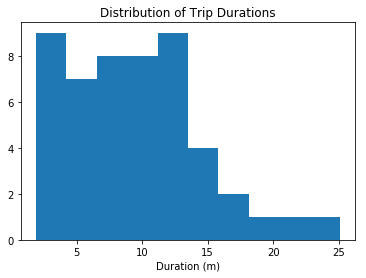

In [45]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

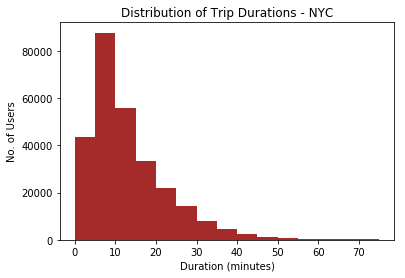

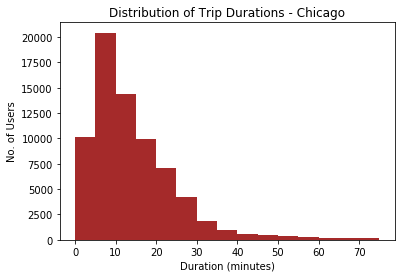

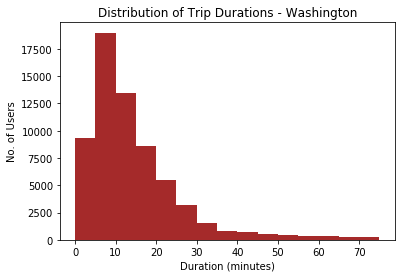

In [46]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##

def histogram_trip(city):
   

    filename = cities[city]
    with open(filename, 'r') as f_in:
        trip_reader = csv.DictReader(f_in)
        trip_dur = []
        for row in trip_reader:
            trip_dur.append(float( row['duration']))
        
        plt.hist(trip_dur, range=(0,75),color='brown' , bins=15)
        plt.title('Distribution of Trip Durations - {}'.format(city) )
        plt.xlabel('Duration (minutes)')
        plt.ylabel('No. of Users')
        plt.show()

for city in cities.keys():
    histogram_trip(city)

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: Peak of Distribution is nearly same for each city in case of **Subscribers**. Between 5-10 min. <br>  Peak of Distribtuion for cities in case of **Customers** is a bit different. <br>  For NYC and Chicago it is 20-25 mins <br> For Washington it is 15-20 mins. <br> 

Mostly distributions are skewed to right. Especially in subscribers case. <br>
In customers case, it's between skewed to right and Symmetric bell shaped. (more to the right though)

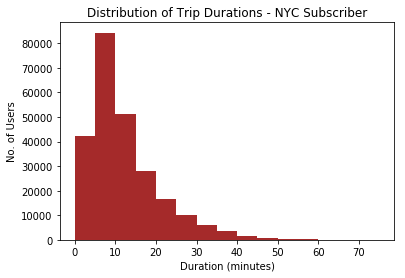

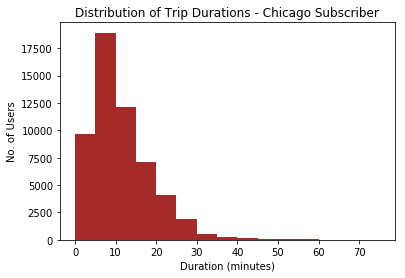

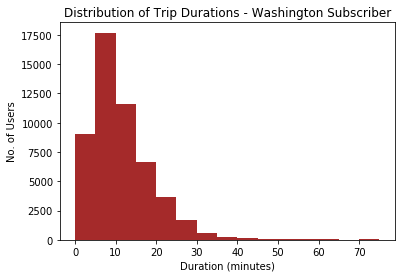

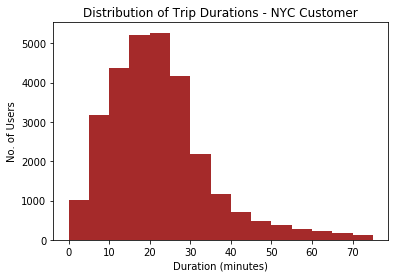

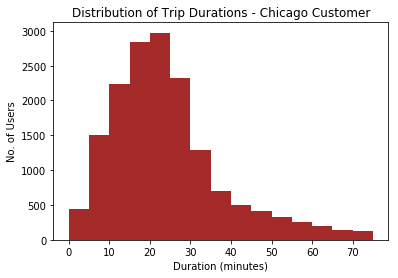

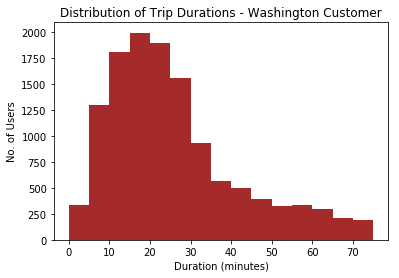

In [47]:
## Use this and additional cells to answer Question 5. ##
def user_histogram(city, user_type):
    filename = cities[city]
    with open(filename, 'r') as file:
        trip_reader = csv.DictReader(file)
        trip_dur = []
        for row in trip_reader:
            if user_type == row['user_type']:
                trip_dur.append( float( row['duration'] ) )
        plt.hist(trip_dur, range=(0,75),color='brown' , bins=15)
        plt.title('Distribution of Trip Durations - {} {}'.format(city, user_type) )
        plt.xlabel('Duration (minutes)')
        plt.ylabel('No. of Users')
        plt.show()

for user in users:
    for city in cities.keys():
        user_histogram(city, user)

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: Most of the trips are between 5 to 10 mins. Here we can see Chicago's weekdays and weekends comparison. On Weekends usage is more and the bar is high in thr region of 20-25 mins as compared to that of Weekdays.

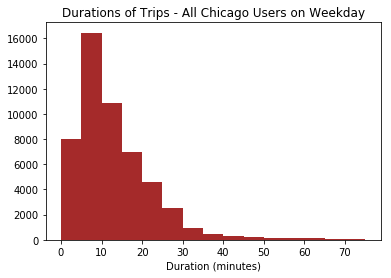

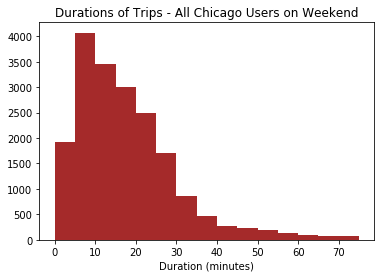

In [53]:
def daytype_histogram(city,day):
    '''
    Histogram on trips on weekends and weekdays
    '''
    filename = cities[city]
    with open(filename, 'r') as file:
        trip_reader = csv.DictReader(file)
        trip_dur = []
        #day_of_week from the summary file
        for row in trip_reader:
            if day_type == 'Weekend':                
                if row['day_of_week'] == 'Saturday' or row['day_of_week'] == 'Sunday':
                    trip_dur.append(float(row['duration']))
            else:
                if row['day_of_week'] == 'Monday' or row['day_of_week'] == 'Tuesday' or row['day_of_week'] == 'Wednesday' or row['day_of_week'] == 'Thursday' or row['day_of_week'] == 'Friday':
                    trip_dur.append(float(row['duration']))
            
        
        plt.hist(trip_dur, range=(0,75),color='brown' , bins=15)
        plt.title('Durations of Trips - All {} Users on {}'.format(city, day_type) )
        plt.xlabel('Duration (minutes)')
        plt.show()

day_types = ('Weekday','Weekend')

for day_type in day_types:
    daytype_histogram('Chicago', day_type)

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I would like to use Data Science to check, where the education is being taught better. Online or in Schools. I will check for all the online sites providing Education Like Udacity, Udemy , Coursera etc. I would like to further check which courses are being opted most by students. Where the traffics is more and which sites are students using. I would like to use that Data to make the sites work better. 
I will check from which area users are registering.


> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0